# Exercises - Pandas
<img src="images/pandas_covid.jpg" width="500">  

So this Notebook is for you to practice pandas commands and get familiar with them. Place this Notebook inside the folder of the last course (where also the folders <code>data/</code> and <code>images/</code> are located).  
As you might want to open the exercise Notebook and the 11_pandas.ipynb at the same time, I suggest you to try Jupyter **Lab**. The Lab is great when you work with several documents at the same time. You can just open them side-by-side. It also allows you to move many cells by click and drop. You can use it either in Azure or on your local computer. A short video might show you some of its possibilities.

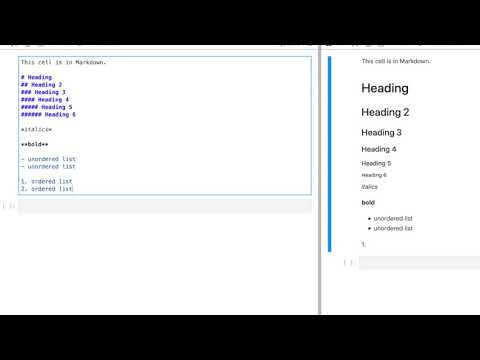

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('A5YyoCKxEOU')

You can open Jupyter Lab either in Azure (right click on the File and select Lab), or in the Anaconda Navigator. 

## COVID-19 DATA

- By running the first cell of the Jupyter Notebook '/data/create_clean_csv_files_covid.ipynb' the latest COVID-19 data will downloaded from the JHU and csv files created in the folder 'data/'. Alternatively you can execute the following code: 

>import shutil  
%run ./data/create_clean_csv_files_covid.ipynb  
shutil.copy2('cases.csv', 'data/')  
shutil.copy2('deaths.csv', 'data/')

- Import the freshly created cases.csv and deaths.csv containing the number of infections and deaths (the latest data is normally from yesterday). Extract from the data the name of the last column, save it as the variable <code>last_day</code> and print it.
-  Use the head(n) function to print the first n=6 rows of the two DataFrames.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file = 'data/cases.csv'   # import cases
cases = pd.read_csv(file,index_col=0)   # Read data from CSV file
cases.index.name = None # no name for index

# save the name of the last column to last_day and print it
# ( lines containing '...' : uncomment them and complete the code)

# last_day = ...
# print (...


In [ ]:
# print the first 6 rows of the cases DataFrame (head)

# ...

In [ ]:
# do the same with file = 'data/deaths.csv'

# ...


Double click **here** for solution.
<!--
import pandas as pd
import matplotlib.pyplot as plt
file = 'data/cases.csv'   # import cases
cases = pd.read_csv(file,index_col=0)   # Read data from CSV file
cases.index.name = None # no name for index
file = 'data/deaths.csv'   # import cases
deaths = pd.read_csv(file,index_col=0)   # Read data from CSV file
deaths.index.name = None # no name for index
last_day = cases.columns[-1]
print ('The data is from: ',last_day)-->

---

With the help of the **dataframe.diff()** function calculate and define the daily number of new infections and daily deaths. (<code>daily_cases</code> and <code>daily_deahts</code>).

In [ ]:
# daily new infections with diff(axis= )

# daily_cases = ...
# daily_cases.head()

In [ ]:
# daily deaths
# ...


click **here** for solution
<!--
daily_cases = cases.diff(axis=1)  
daily_deaths = deaths.diff(axis=1) -->


---

Use the <code>iloc[:,-4:]</code> function in combination with head(5). To show the number of daily infections for 5 countries for the last 4 days. 

In [ ]:
# print the daily new infections for the last 4 days


Click **here** for solution.
<!--
daily_cases.iloc[:,-4:].head(5) -->

---

The countries are ordered like the <code>cases</code> DataFrame (US, Spain,...). Use the <code>sort_values</code> function to sort the DataFrame (highest number of daily infections of the last day up). Print the 7 countries with the highest number of daily infections for the last 4 days.

In [1]:
# sort the dataFrame with .sort_values(column_name, axis= ....)

# and apply afterwards the selection .iloc[] and head(7)
# Try to do it piece by piece


Click **here** for solution.
<!-- 
daily_cases.sort_values(last_day,ascending=False).head(7).iloc[:,-4:] -->

---

Now print the number of daily infections of the last 7 days for the countries Italy, Germany and Russia. (Hint: use the <code>.loc[ ['country1','country2',...]]</code> method to get access to the countries and apply afterwards a <code>.iloc[:,-days:]</code> method to choose the days)

In [ ]:
# 


Click **here** for solution.
<!-- 
countries = [ 'Italy', 'Germany', 'Russia']
daily_cases.loc[countries].iloc[:,-7:]-->

---

Calculate the mean number of daily infections for the last 7 days for those countries (Hint: use the <code>.mean(axis=....)</code> function)

Double click for **Solution**
<!--
daily_cases.loc[countries].iloc[:,-7:].mean(axis=1) -->

---

Try to plot the daily new cases for those countries as a line plot for all days (Hint, you need to <code>.transpose()</code> the DataFrame to bring it to the right format for the line plot)

In [ ]:
# line plot


**Solution**
<!--
daily_cases.loc[countries].transpose().plot(kind='line'); -->

As these are quite noisy: plot instead the averaged values for 7 days , add a title, increase the figure size and label the axes. (Hint:<code>rolling(window).mean().plot()</code>)

In [ ]:
# plotting the average values


Click **here** for solution.
<!--
daily_cases.loc[countries].transpose().rolling(7).mean().plot(kind='line',figsize=(7,5))
plt.title('title',fontsize=14)
plt.ylabel('...')
plt.xlabel('...'); -->

You might also plot only the last days, as biggest part of the data is zero at the beginning.

---

In order to compare one country with another it makes sense to normalize the data to the number of inhabitants in those countries.
Import the csv file containing the populations of 2018 and normalize the 4 DataFrames to 'number per 100000 inhabitants':

In [ ]:
# importing the DataFrame containing populations of all countries


Click **here** for solution.
<!--
population_2018 = pd.read_csv('data/population_2018.csv',index_col=0)
population_2018.index.name = None
population_2018,head() -->

In [ ]:
# normalise the cases to cases per 100.000 inhabitants
# normalise the cases to cases per 100k inhabitants

# transform to a series
population_2018 = population_2018['Value']
cases_pI = cases.div(population_2018.loc[cases.index],axis=0) * 100000
deaths_pI = deaths.div(population_2018.loc[deaths.index],axis=0) * 100000

daily_cases_pI = cases_pI.diff(axis=1)
daily_deaths_pI = deaths_pI.diff(axis=1)

# the code below works on the latest pandas version, the upper one at azure
# cases_pI = cases / population_2018.loc[cases.index].values * 100000

# deaths_pI = deaths / population_2018.loc[deaths.index].values * 100000

# daily_cases_pI = cases_pI.diff(axis=1)
# daily_deaths_pI = deaths_pI.diff(axis=1)

Now create a bar plot showing the number of deaths per 100 000 inhabitants for the 10 countries with the highest numbers. Give it a title and change the figure size accordingly.

In [ ]:
# bar plot


---

## Final Exercise 
As you have access to all the 8 DataFrames (a huge amount of interesting data), create any stimulating plot you can think of (over time, or whatever comparison you want to see or understand, maybe a scatter plot,...).  
**Here is the point where you should become creative.**   
With those plots and some text, try to tell a little story about it (use heading, bold,...). Also you might try to save the figure as a pdf, or jpg file. (Hint: search in google:'pandas save plot'). 

some heading

some text

In [ ]:
# some plots or calculations




and a little conclusion

## Final Remark
**After completing this exercise send the Notebook to robert.biele1@tu-dresden.de. Any comments or ideas for the next courses are most welcome! Thanks.**